## Doing Some additional Features Engineering

Data in stats.pkl

First, load in needed packages

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from IPython.core.display import display, HTML    # make sure Jupyter knows to display it as HTML
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import unicodedata
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [3]:
pwd

'/Users/patrickbovard/Documents/GitHub/Metis_Project_2'

Next, load my stats dataframe in from teh pickle file:

In [4]:
stats_df = pd.read_pickle("./stats.pkl")

## Data Cleaning:

Using same cleaning steps as in "first_model_notebook":

Fixing pitchers:

In [5]:
stats_df.iloc[714, 22] = 'DH' #Ohtani, 2018
stats_df.iloc[1021, 22] = 'LF' #Eibner, 2016
stats_df.iloc[1498, 22] = 'DH' #Ohtani, 2019
stats_df.iloc[1750, 22] = 'CF' #Gose, 2015
stats_df.iloc[1781, 22] = '1B' #Davis, 2015

Changing Kennys Vargas from IF to 1B:

In [6]:
stats_df.iloc[1477, 22] = '1B' #Kennys Vargas, 2017

In [7]:
stats_df.Position.value_counts()

3B    263
2B    245
C     239
CF    222
1B    218
LF    212
SS    207
RF    200
OF     56
DH     31
Name: Position, dtype: int64

## Visualization:

Visualizing with Seaborn:

In [8]:
stats_df.corr()

Year       Age        PA         G  Avg EV (MPH)  \
Year                 1.000000 -0.050360 -0.177433 -0.259925      0.090235   
Age                 -0.050360  1.000000  0.007203  0.039772     -0.013654   
PA                  -0.177433  0.007203  1.000000  0.914547      0.201251   
G                   -0.259925  0.039772  0.914547  1.000000      0.090639   
Avg EV (MPH)         0.090235 -0.013654  0.201251  0.090639      1.000000   
Avg LA (°)           0.145444  0.044688  0.054227  0.024089      0.098858   
Barrel%              0.217394 -0.059126  0.119729  0.024670      0.734754   
Solid Contact %      0.146280  0.053587  0.128354  0.055503      0.568639   
Hard Hit %           0.190818 -0.013957  0.152829  0.037690      0.924395   
Zone Swing %         0.105675 -0.105471  0.033756  0.035700      0.078073   
Out of Zone Swing % -0.035602 -0.125381  0.029977  0.052812     -0.100522   
Pull %               0.063524  0.044283  0.020088 -0.005901      0.158695   
Straight Away %     -0.051559 -0.019327  0.034291  0.054583     -0.031002   
Oppo %              -0.040768 -0.043534 -0.059823 -0.042227     -0.191750   
GB%                 -0.164337 -0.058080 -0.096653 -0.044732     -0.192306   
FB%                  0.208470  0.053814  0.124765  0.088417      0.278015   
LD %                -0.038431  0.047267  0.043566 -0.016867      0.083149   
Sprint Speed         0.046489 -0.462905  0.027853  0.026060     -0.171607   
wRC+                 0.075645 -0.043366  0.348204  0.187745      0.524570   

                     Avg LA (°)   Barrel%  Solid Contact %  Hard Hit %  \
Year                   0.145444  0.217394         0.146280    0.190818   
Age                    0.044688 -0.059126         0.053587   -0.013957   
PA                     0.054227  0.119729         0.128354    0.152829   
G                      0.024089  0.024670         0.055503    0.037690   
Avg EV (MPH)           0.098858  0.734754         0.568639    0.924395   
Avg LA (°)             1.000000  0.379588         0.344416    0.128029   
Barrel%                0.379588  1.000000         0.515741    0.788451   
Solid Contact %        0.344416  0.515741         1.000000    0.635636   
Hard Hit %             0.128029  0.788451         0.635636    1.000000   
Zone Swing %           0.090601  0.180358         0.095977    0.122035   
Out of Zone Swing %   -0.052752 -0.079713        -0.130652   -0.096551   
Pull %                 0.584696  0.337267         0.268004    0.178268   
Straight Away %       -0.488535 -0.173592        -0.140813   -0.023470   
Oppo %                -0.364187 -0.308958        -0.242689   -0.225663   
GB%                   -0.938844 -0.442484        -0.447042   -0.231581   
FB%                    0.815476  0.542669         0.467358    0.310284   
LD %                   0.089665  0.025316         0.196527    0.081703   
Sprint Speed          -0.149793 -0.130303        -0.196761   -0.179654   
wRC+                   0.160165  0.545957         0.383263    0.529016   

                     Zone Swing %  Out of Zone Swing %    Pull %  \
Year                     0.105675            -0.035602  0.063524   
Age                     -0.105471            -0.125381  0.044283   
PA                       0.033756             0.029977  0.020088   
G                        0.035700             0.052812 -0.005901   
Avg EV (MPH)             0.078073            -0.100522  0.158695   
Avg LA (°)               0.090601            -0.052752  0.584696   
Barrel%                  0.180358            -0.079713  0.337267   
Solid Contact %          0.095977            -0.130652  0.268004   
Hard Hit %               0.122035            -0.096551  0.178268   
Zone Swing %             1.000000             0.541675  0.039664   
Out of Zone Swing %      0.541675             1.000000 -0.076479   
Pull %                   0.039664            -0.076479  1.000000   
Straight Away %         -0.059687             0.043577 -0.691864   
Oppo %                  -0.000912             0.066

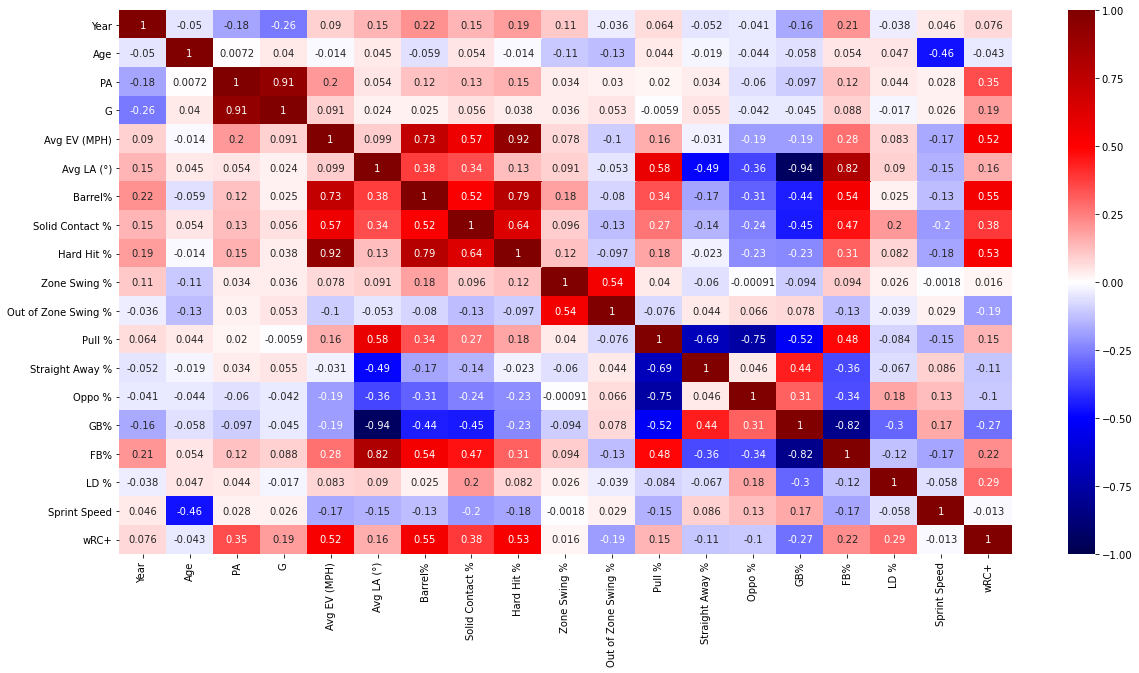

In [9]:
sns.heatmap(stats_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

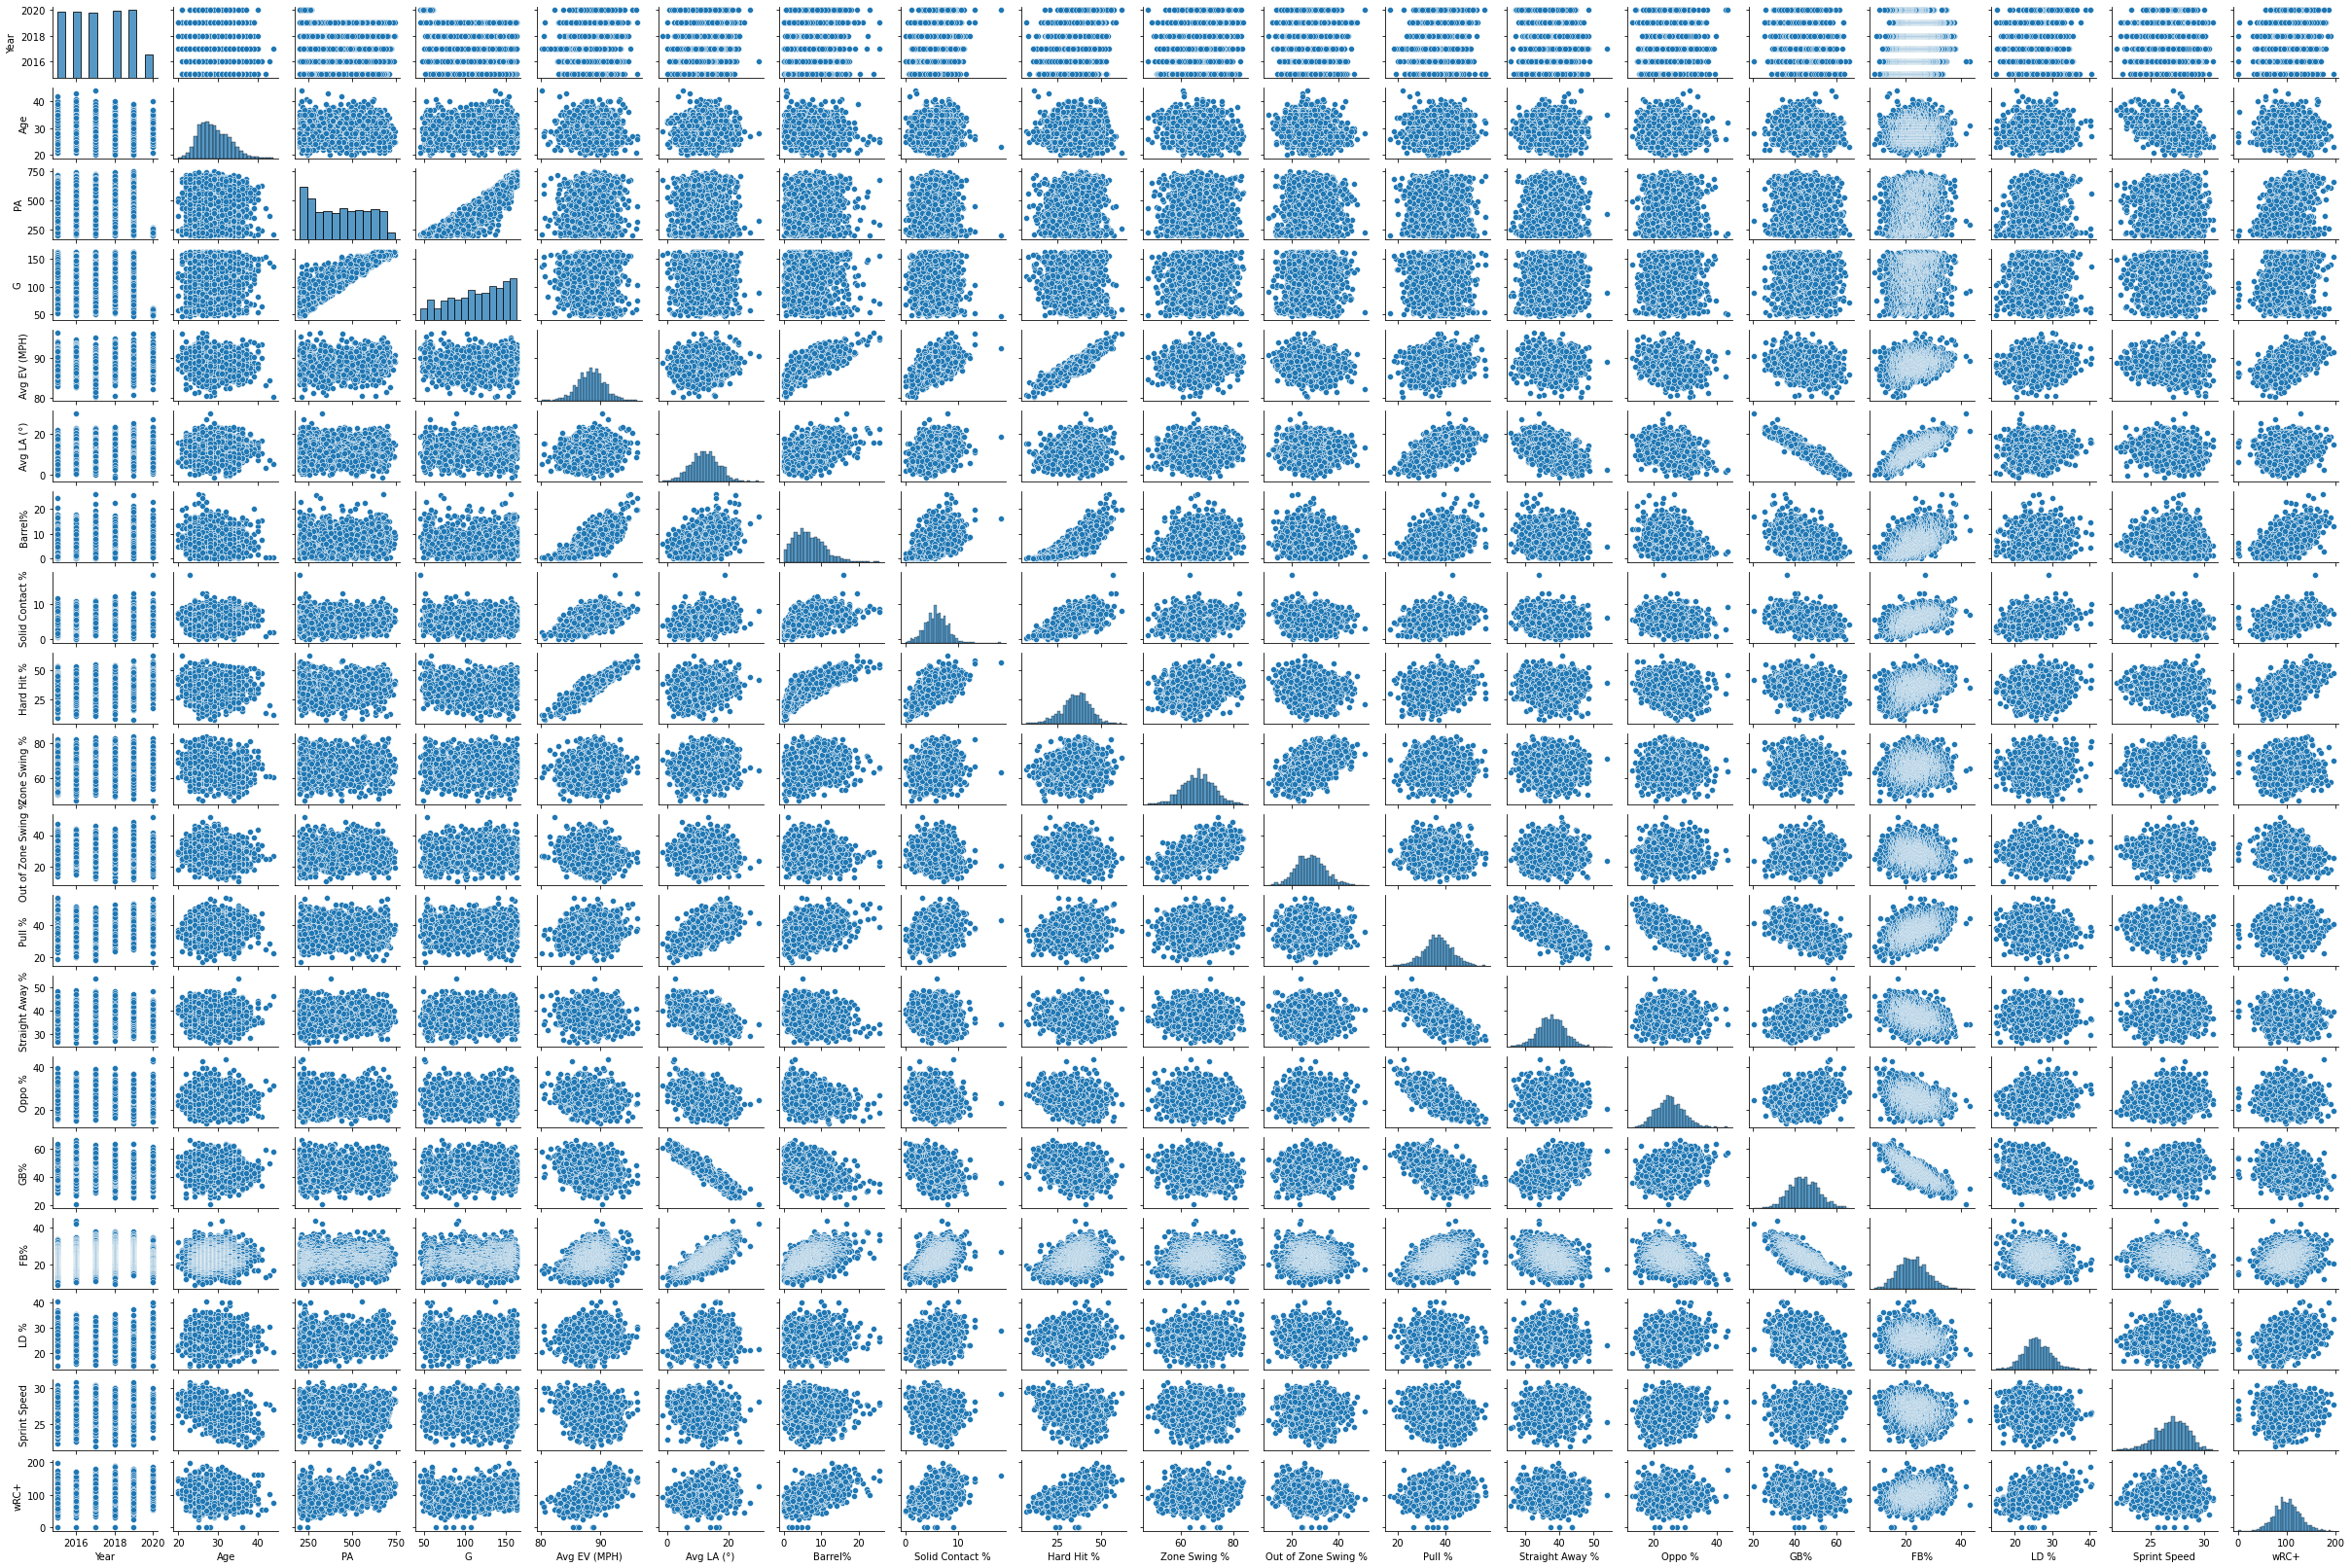

In [10]:
sns.pairplot(stats_df, height=1.2, aspect=1.5);

In [11]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               1893 non-null   object 
 1   Year                 1893 non-null   float64
 2   Age                  1893 non-null   float64
 3   PA                   1893 non-null   float64
 4   G                    1893 non-null   float64
 5   Avg EV (MPH)         1893 non-null   float64
 6   Avg LA (°)           1893 non-null   float64
 7   Barrel%              1893 non-null   float64
 8   Solid Contact %      1893 non-null   float64
 9   Hard Hit %           1893 non-null   float64
 10  Zone Swing %         1893 non-null   float64
 11  Out of Zone Swing %  1893 non-null   float64
 12  Pull %               1893 non-null   float64
 13  Straight Away %      1893 non-null   float64
 14  Oppo %               1893 non-null   float64
 15  GB%                  1893 non-null   f

Feature Engineering Thoughts:  
- Will Still remove player, year, PA, G, Player Link_x, Player_Year_ID, and Position.
- Based on low correlation in Lasso/Ridge Regression so far in third_model_regression, I will also be dropping Zone Swing %.
- One thought: measure LD + FB over GB (i.e. Air vs. Ground Rate)
- Hard Hit Rate: 95mph or Faster
- Solid Contact Rate: Rate of SOlid contact?
- Hit Profile: Pull to Straight Away + Oppo?

In [12]:
stats_df_2 = stats_df.copy()
stats_df_2.drop(columns = ['Year', 'Player', 'PA', 'G', 'Player Link_x', 'Player_Year_ID', 'Position', 'Zone Swing %'], inplace=True)

In [13]:
stats_df_2.head()

Age  Avg EV (MPH)  Avg LA (°)  Barrel%  Solid Contact %  Hard Hit %  \
0  31.0          89.2        21.4     11.6              6.8        35.4   
1  28.0          90.3        29.7     16.7              8.0        41.4   
2  24.0          93.3        23.0     22.1              8.3        52.2   
3  33.0          90.7        21.6     13.7             11.5        44.7   
4  32.0          90.2        21.4     13.4              8.2        43.7   

   Out of Zone Swing %  Pull %  Straight Away %  Oppo %   GB%   FB%  LD %  \
0                 23.9    44.2             34.0    21.8  31.3  43.5  19.7   
1                 23.4    41.4             33.9    24.7  20.1  42.0  21.8   
2                 28.2    50.2             29.2    20.6  29.2  37.9  22.1   
3                 18.5    47.6             30.7    21.7  28.3  37.8  28.5   
4                 37.0    42.9             29.9    27.3  29.4  37.7  19.9   

   Sprint Speed  wRC+  
0          25.6    70  
1          28.2   128  
2          27.8   119  
3          26.5   140  
4          26.7    98

In [14]:
stats_df_2['AirRate'] = (stats_df_2['LD %'] + stats_df_2['FB%']) / stats_df_2['GB%']

In [15]:
stats_df_2['Pull-MiddleToOppo'] = (stats_df_2['Pull %'] + stats_df_2['Straight Away %'] / stats_df_2['Oppo %'])

In [16]:
stats_df_2.head()

Age  Avg EV (MPH)  Avg LA (°)  Barrel%  Solid Contact %  Hard Hit %  \
0  31.0          89.2        21.4     11.6              6.8        35.4   
1  28.0          90.3        29.7     16.7              8.0        41.4   
2  24.0          93.3        23.0     22.1              8.3        52.2   
3  33.0          90.7        21.6     13.7             11.5        44.7   
4  32.0          90.2        21.4     13.4              8.2        43.7   

   Out of Zone Swing %  Pull %  Straight Away %  Oppo %   GB%   FB%  LD %  \
0                 23.9    44.2             34.0    21.8  31.3  43.5  19.7   
1                 23.4    41.4             33.9    24.7  20.1  42.0  21.8   
2                 28.2    50.2             29.2    20.6  29.2  37.9  22.1   
3                 18.5    47.6             30.7    21.7  28.3  37.8  28.5   
4                 37.0    42.9             29.9    27.3  29.4  37.7  19.9   

   Sprint Speed  wRC+   AirRate  Pull-MiddleToOppo  
0          25.6    70  2.019169          45.759633  
1          28.2   128  3.174129          42.772470  
2          27.8   119  2.054795          51.617476  
3          26.5   140  2.342756          49.014747  
4          26.7    98  1.959184          43.995238

In [17]:
#stats_df_2.drop(columns=['Pull %', 'Straight Away %', 'Oppo %', 'FB%', 'GB%'], inplace=True)

In [18]:
stats_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1893 non-null   float64
 1   Avg EV (MPH)         1893 non-null   float64
 2   Avg LA (°)           1893 non-null   float64
 3   Barrel%              1893 non-null   float64
 4   Solid Contact %      1893 non-null   float64
 5   Hard Hit %           1893 non-null   float64
 6   Out of Zone Swing %  1893 non-null   float64
 7   Pull %               1893 non-null   float64
 8   Straight Away %      1893 non-null   float64
 9   Oppo %               1893 non-null   float64
 10  GB%                  1893 non-null   float64
 11  FB%                  1893 non-null   float64
 12  LD %                 1893 non-null   float64
 13  Sprint Speed         1893 non-null   float64
 14  wRC+                 1893 non-null   int64  
 15  AirRate              1893 non-null   f

In [19]:
stats_df_2.corr()

Age  Avg EV (MPH)  Avg LA (°)   Barrel%  \
Age                  1.000000     -0.013654    0.044688 -0.059126   
Avg EV (MPH)        -0.013654      1.000000    0.098858  0.734754   
Avg LA (°)           0.044688      0.098858    1.000000  0.379588   
Barrel%             -0.059126      0.734754    0.379588  1.000000   
Solid Contact %      0.053587      0.568639    0.344416  0.515741   
Hard Hit %          -0.013957      0.924395    0.128029  0.788451   
Out of Zone Swing % -0.125381     -0.100522   -0.052752 -0.079713   
Pull %               0.044283      0.158695    0.584696  0.337267   
Straight Away %     -0.019327     -0.031002   -0.488535 -0.173592   
Oppo %              -0.043534     -0.191750   -0.364187 -0.308958   
GB%                 -0.058080     -0.192306   -0.938844 -0.442484   
FB%                  0.053814      0.278015    0.815476  0.542669   
LD %                 0.047267      0.083149    0.089665  0.025316   
Sprint Speed        -0.462905     -0.171607   -0.149793 -0.130303   
wRC+                -0.043366      0.524570    0.160165  0.545957   
AirRate              0.062318      0.232200    0.861934  0.471705   
Pull-MiddleToOppo    0.045587      0.163424    0.577770  0.340338   

                     Solid Contact %  Hard Hit %  Out of Zone Swing %  \
Age                         0.053587   -0.013957            -0.125381   
Avg EV (MPH)                0.568639    0.924395            -0.100522   
Avg LA (°)                  0.344416    0.128029            -0.052752   
Barrel%                     0.515741    0.788451            -0.079713   
Solid Contact %             1.000000    0.635636            -0.130652   
Hard Hit %                  0.635636    1.000000            -0.096551   
Out of Zone Swing %        -0.130652   -0.096551             1.000000   
Pull %                      0.268004    0.178268            -0.076479   
Straight Away %            -0.140813   -0.023470             0.043577   
Oppo %                     -0.242689   -0.225663             0.066022   
GB%                        -0.447042   -0.231581             0.078076   
FB%                         0.467358    0.310284            -0.132647   
LD %                        0.196527    0.081703            -0.038772   
Sprint Speed               -0.196761   -0.179654             0.028975   
wRC+                        0.383263    0.529016            -0.190894   
AirRate                     0.464971    0.263779            -0.120403   
Pull-MiddleToOppo           0.270320    0.184450            -0.077502   

                       Pull %  Straight Away %    Oppo %       GB%       FB%  \
Age                  0.044283        -0.019327 -0.043534 -0.058080  0.053814   
Avg EV (MPH)         0.158695        -0.031002 -0.191750 -0.192306  0.278015   
Avg LA (°)           0.584696        -0.488535 -0.364187 -0.938844  0.815476   
Barrel%              0.337267        -0.173592 -0.308958 -0.442484  0.542669   
Solid Contact %      0.268004        -0.140813 -0.242689 -0.447042  0.467358   
Hard Hit %           0.178268        -0.023470 -0.225663 -0.231581  0.310284   
Out of Zone Swing % -0.076479         0.043577  0.066022  0.078076 -0.132647   
Pull %               1.000000        -0.691864 -0.753015 -0.516461  0.484901   
Straight Away %     -0.691864         1.000000  0.045989  0.443583 -0.359145   
Oppo %              -0.753015         0.045989  1.000000  0.310789 -0.344092   
GB%                 -0.516461         0.443583  0.310789  1.000000 -0.822902   
FB%                  0.484901        -0.359145 -0.344092 -0.822902  1.000000   
LD %                -0.083906        -0.067377  0.177248 -0.301627 -0.121289   
Sprint Speed        -0.152313         0.086330  0.132132  0.169739 -0.173322   
wRC+                 0.147660        -0.112123 -0.102814 -0.274987  0.224647   
AirRate              0.440650        -0.403196 -0.242826 -0.953530  0.821415   
Pull-MiddleToOppo    0.998800        -0.656624 -0.783470 -0.509609  0.481700   

                         LD

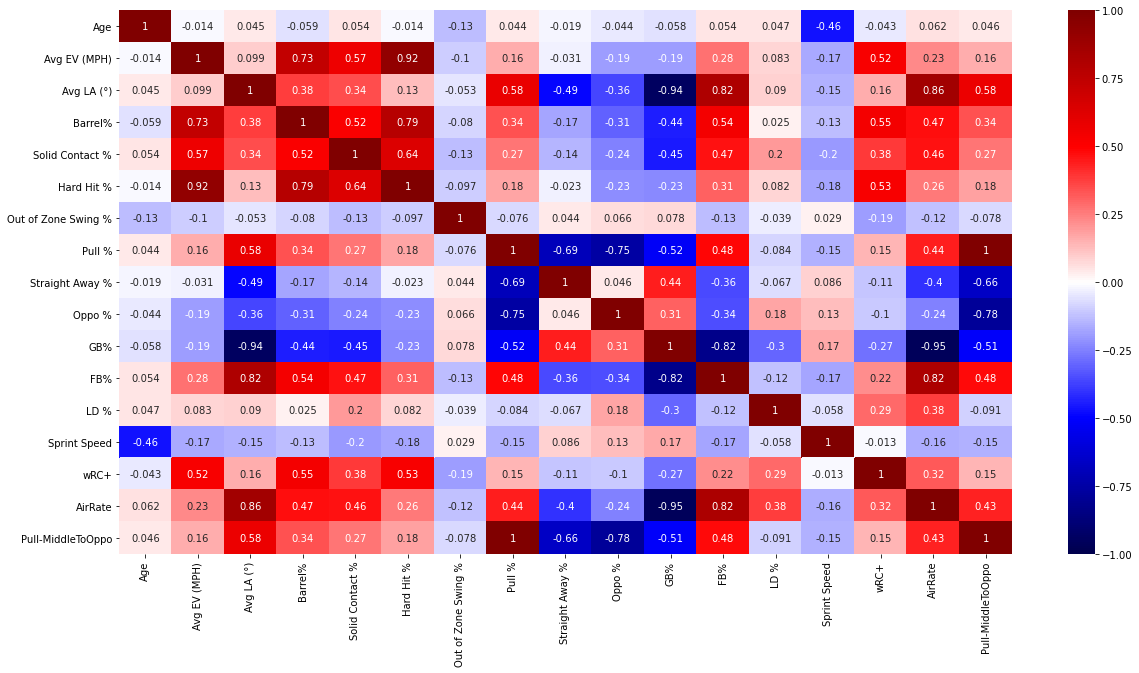

In [20]:
sns.heatmap(stats_df_2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

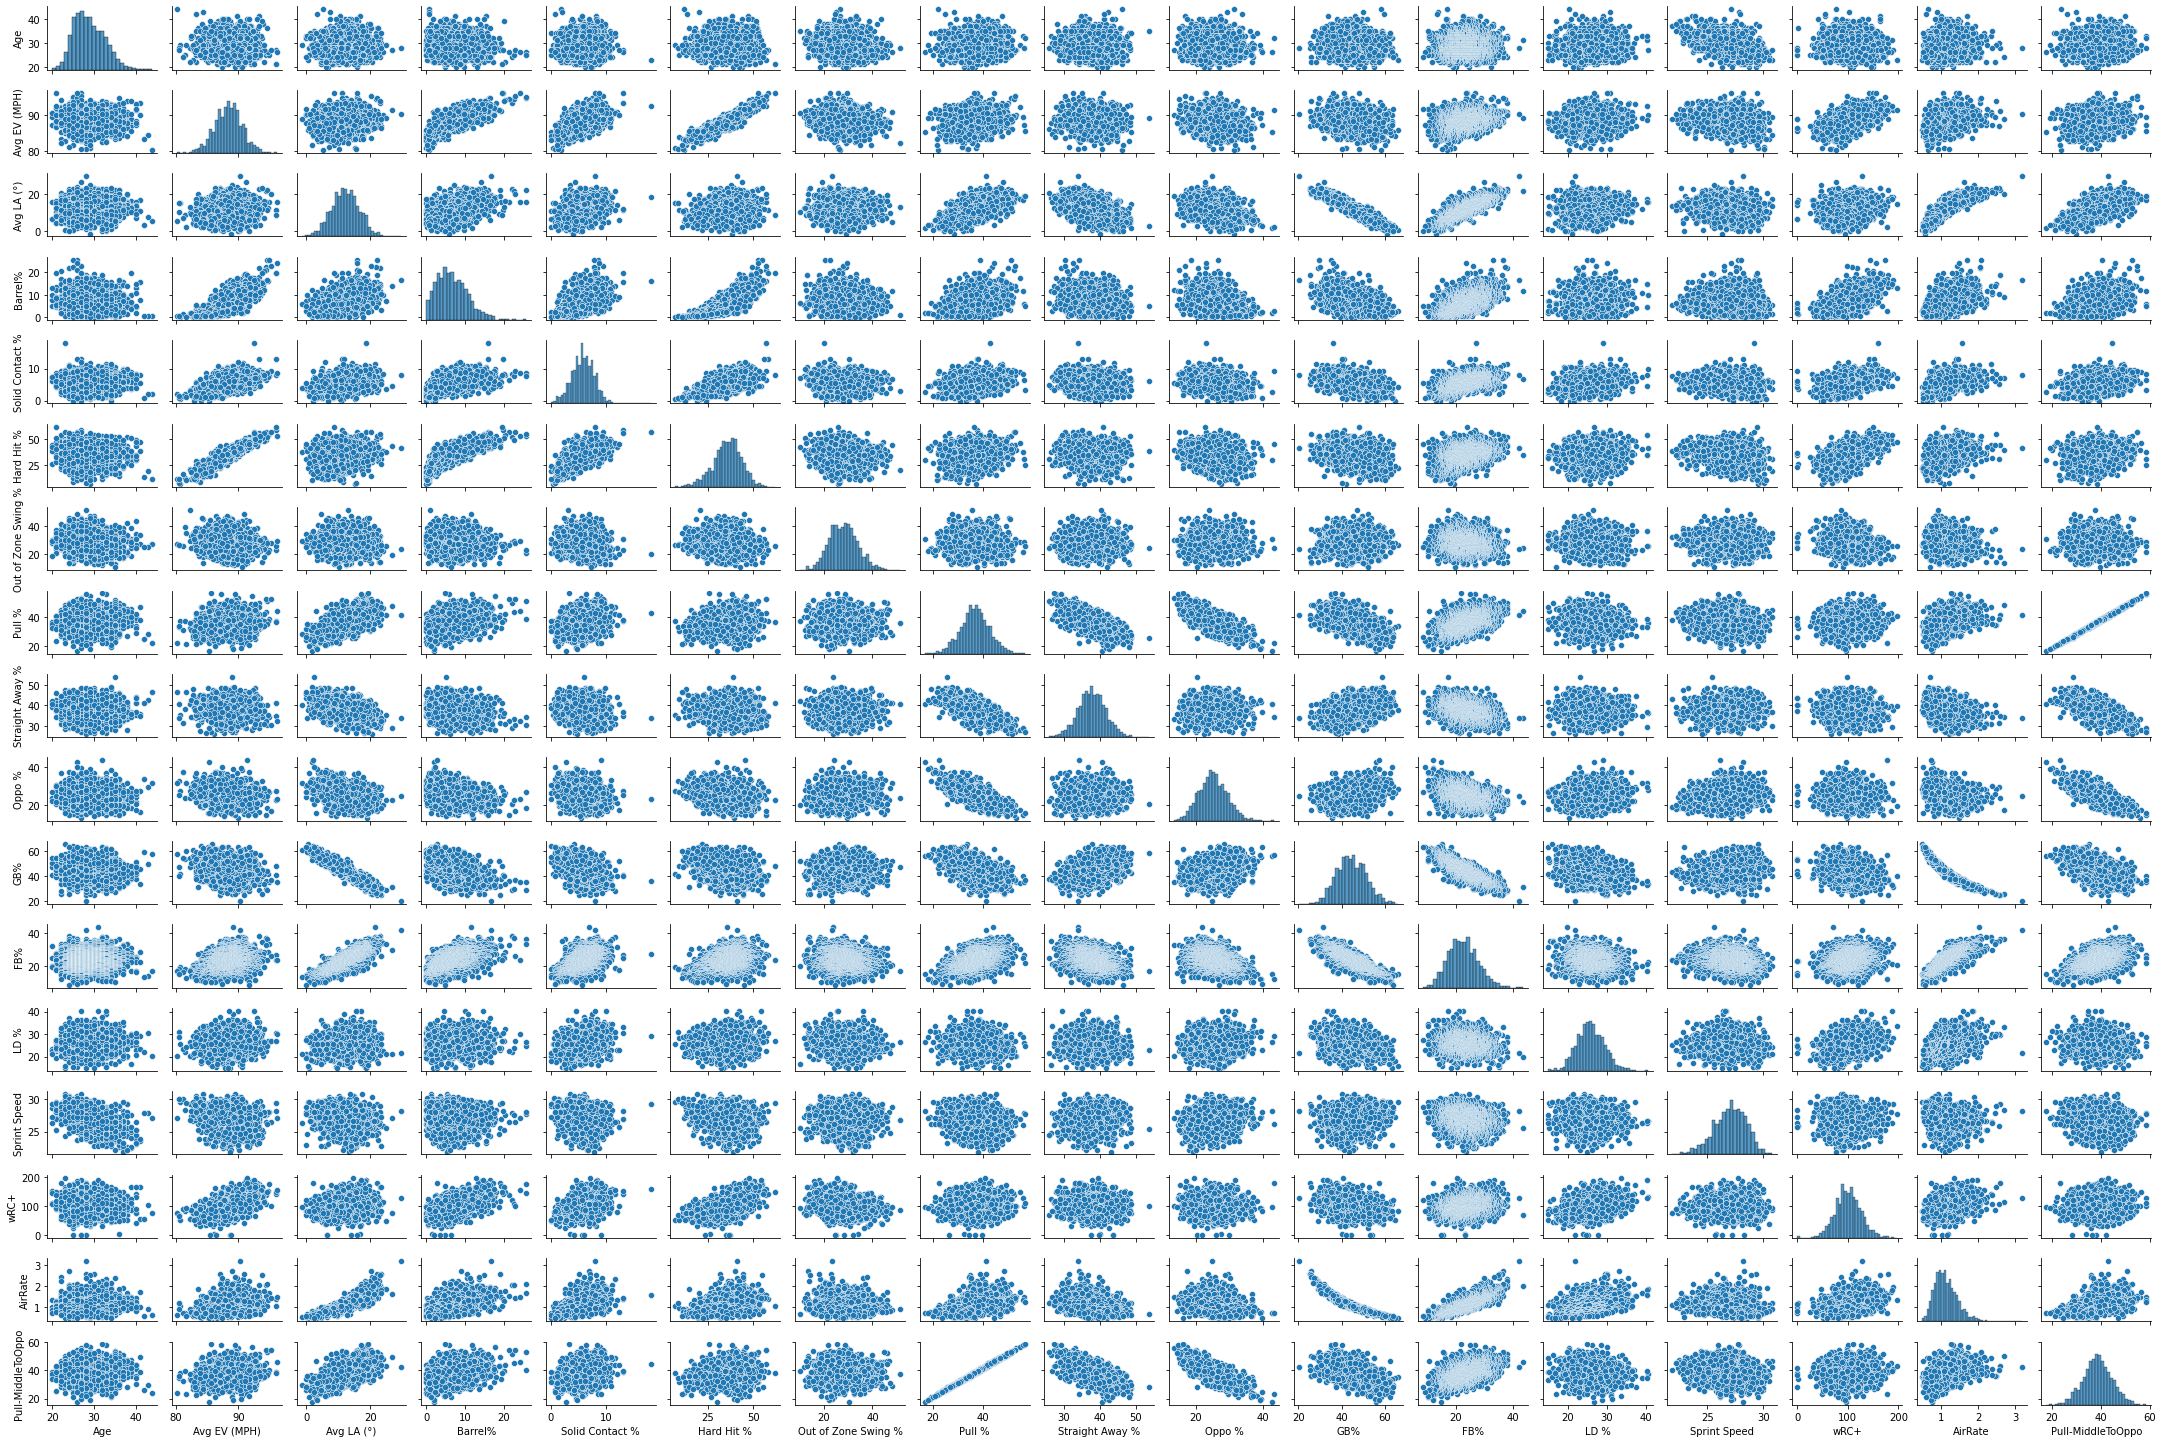

In [21]:
sns.pairplot(stats_df_2, height=1.2, aspect=1.5);

Great, let's try this new DF on Lasso / Ridge:

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
ridge_df = stats_df_2.copy()

Dividing up the data into train, val, and test and standard scaling the train/val.  Will run through Lasso and Ridge to see the best fit.

In [24]:
X = ridge_df.drop(columns='wRC+')
y = ridge_df['wRC+']

In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [26]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train_val.values)

StandardScaler()

In [27]:
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)

## RIDGE:

In [43]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-5,5,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train_val)

RidgeCV(alphas=array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643352e-05, 9.01101825e-05,
       1.01163798e-04, 1.13573336e-0...
       6.98587975e+03, 7.84282206e+03, 8.80488358e+03, 9.88495905e+03,
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
        cv=5)

In [44]:
ridge_model.alpha_

34.092850697468144

In [45]:
list(zip(X_train_val.columns, ridge_model.coef_))

[('Age', -0.10650389163131598),
 ('Avg EV (MPH)', 5.15883955201649),
 ('Avg LA (°)', -3.188114824034681),
 ('Barrel%', 9.0474983239036),
 ('Solid Contact %', 0.11597308120338734),
 ('Hard Hit %', 1.2546097737233457),
 ('Out of Zone Swing %', -3.219893724966294),
 ('Pull %', 0.274674516498365),
 ('Straight Away %', -0.8795922208181708),
 ('Oppo %', 0.004158434782920784),
 ('GB%', -2.5157608506059157),
 ('FB%', -1.4856354822577946),
 ('LD %', 5.254579660616696),
 ('Sprint Speed', 2.8055920152796467),
 ('AirRate', 1.6876543782278763),
 ('Pull-MiddleToOppo', 0.29345738533495314)]

In [46]:
ridge_model.score(X_tr, y_train_val)

0.4296175504751656

## LASSO:

In [56]:
lasso_model = LassoCV(alphas = np.linspace(0,100000), cv=5)
lasso_model.fit(X_tr, y_train_val)

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227765.63069967116, tolerance: 79.82856052848885
  model = cd_fast.enet_coordinate_descent_gram(
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: Convergen

LassoCV(alphas=array([     0.        ,   2040.81632653,   4081.63265306,   6122.44897959,
         8163.26530612,  10204.08163265,  12244.89795918,  14285.71428571,
        16326.53061224,  18367.34693878,  20408.16326531,  22448.97959184,
        24489.79591837,  26530.6122449 ,  28571.42857143,  30612.24489796,
        32653.06122449,  34693.87755102,  36734.69387755,  38775.51020408,
        40816.32653061,  42857.14285714,  44897.95918367,...
        48979.59183673,  51020.40816327,  53061.2244898 ,  55102.04081633,
        57142.85714286,  59183.67346939,  61224.48979592,  63265.30612245,
        65306.12244898,  67346.93877551,  69387.75510204,  71428.57142857,
        73469.3877551 ,  75510.20408163,  77551.02040816,  79591.83673469,
        81632.65306122,  83673.46938776,  85714.28571429,  87755.10204082,
        89795.91836735,  91836.73469388,  93877.55102041,  95918.36734694,
        97959.18367347, 100000.        ]),
        cv=5)

In [57]:
lasso_model.alpha_

0.0

In [58]:
list(zip(X_train_val.columns, lasso_model.coef_))

[('Age', -0.03139391752796874),
 ('Avg EV (MPH)', 5.821418560368962),
 ('Avg LA (°)', -5.075201808144972),
 ('Barrel%', 9.810376219638796),
 ('Solid Contact %', 0.19345006761811953),
 ('Hard Hit %', -0.011131893372930343),
 ('Out of Zone Swing %', -3.3140950000718683),
 ('Pull %', 0.9588686398077418),
 ('Straight Away %', -4.602910053559118),
 ('Oppo %', -4.49515380466576),
 ('GB%', -5.132690005500636),
 ('FB%', -2.1584020173976777),
 ('LD %', 4.829269406508677),
 ('Sprint Speed', 2.866671530806496),
 ('AirRate', 1.315247101668639),
 ('Pull-MiddleToOppo', -6.332802179545954)]

In [59]:
lasso_model.score(X_tr, y_train_val)

0.43036766071922283

## Lasso performed better --> Test:

Lasso:

In [81]:
lasso_test_set_pred = lasso_model.predict(X_te)

In [82]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

mae(y_test, lasso_test_set_pred)

15.362506482050934

In [83]:
r2_score(y_test, lasso_test_set_pred)

0.42833478671133796

Text(0, 0.5, 'Actual Test Values')

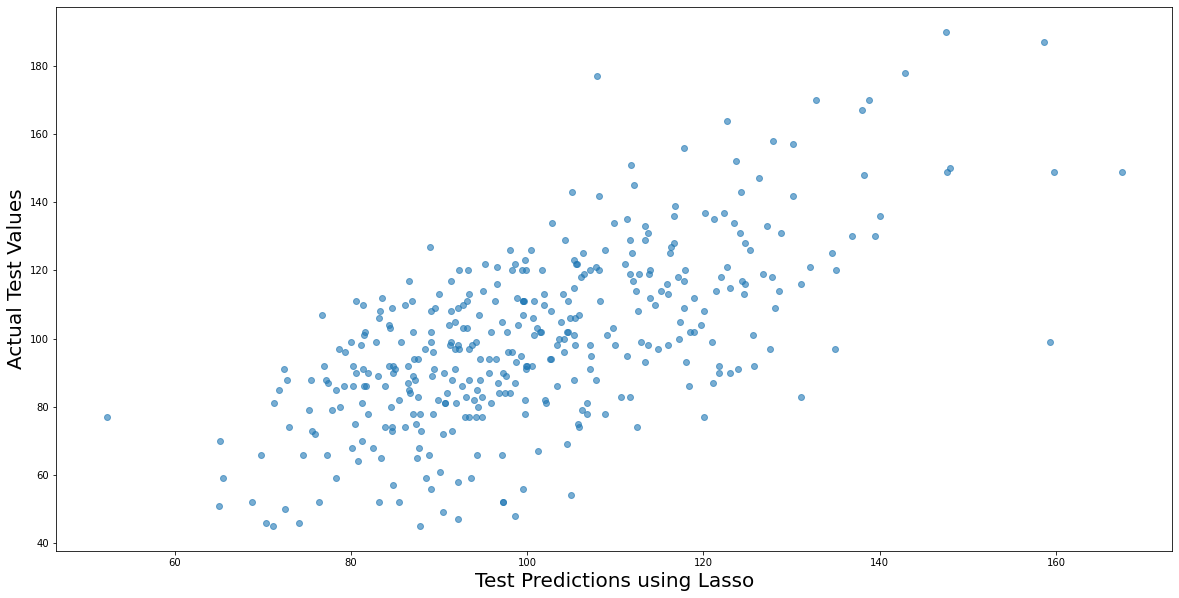

In [85]:
plt.scatter(lasso_test_set_pred, y_test, alpha = 0.6)
plt.xlabel('Test Predictions using Lasso', size = 20)
plt.ylabel('Actual Test Values', size = 20)

Ridge:

In [86]:
ridge_test_set_pred = ridge_model.predict(X_te)

In [87]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

mae(y_test, ridge_test_set_pred)

15.338164357565256

In [88]:
r2_score(y_test, ridge_test_set_pred)

0.42832040138604843

Text(0, 0.5, 'Actual Test Values')

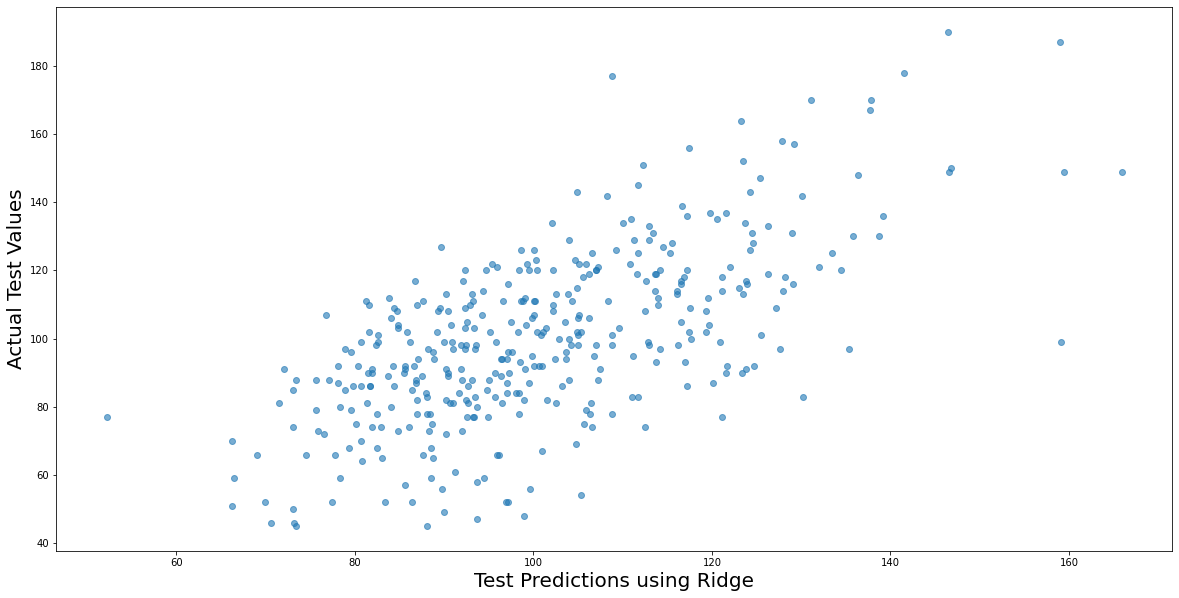

In [89]:
plt.scatter(ridge_test_set_pred, y_test, alpha = 0.6)
plt.xlabel('Test Predictions using Ridge', size = 20)
plt.ylabel('Actual Test Values', size = 20)